<a href="https://colab.research.google.com/github/francisrod01/ML_image_BGR_to_gray/blob/main/ML_image_BGR_to_gray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image binarization

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files


In [ ]:
uploaded = files.upload()
for name, contents in uploaded.items():
  print(f'file name {name} was uploaded with content {contents}')

  

Saving 27.jpg to 27.jpg
file name 27.jpg was uploaded with content b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1\x19\xabExif\x00\x00II*\x00\x08\x00\x00\x00\x0b\x00\x0e\x01\x02\x00 \x00\x00\x00\x92\x00\x00\x00\x0f\x01\x02\x00\x05\x00\x00\x00\xb2\x00\x00\x00\x10\x01\x02\x00\x07\x00\x00\x00\xb7\x00\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x00\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00\xbe\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00\xc6\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x002\x01\x02\x00\x14\x00\x00\x00\xce\x00\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00\xfe\x00\x00\x00\xa5\xc4\x07\x00\x1c\x00\x00\x00\xe2\x00\x00\x00\x00\t\x00\x00                               \x00SONY\x00DSC-W1\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x002006:10:19 13:59:35\x00PrintIM\x000250\x00\x00\x02\x00\x02\x00\x01\x00\x00\x00\x01\x01\x00\x00\x00\x00\x1e\x00\x9a\x82\x05\x00\x01\x00\x00\x00l\x02\x00\x00\x9d\x82\x05\x

In [ ]:
img_uploaded = next(iter(uploaded))
img_uploaded

'27.jpg'

In [ ]:
img = cv2.imread(img_uploaded)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(img, (7, 7), 0) ## apply blur
(T, bin) = cv2.threshold(blur, 160, 255, cv2.THRESH_BINARY)
(T, binI) = cv2.threshold(blur, 160, 255, cv2.THRESH_BINARY_INV)
result = np.vstack([
    np.hstack([blur, bin]),
    np.hstack([binI, cv2.bitwise_and(img, img, mask = binI)])
])
result

array([[163, 160, 155, ...,   0,   0,   0],
       [163, 160, 155, ...,   0,   0,   0],
       [162, 159, 155, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 138, 120, 124],
       [255, 255, 255, ..., 132, 134, 134],
       [255, 255, 255, ..., 146, 130, 128]], dtype=uint8)

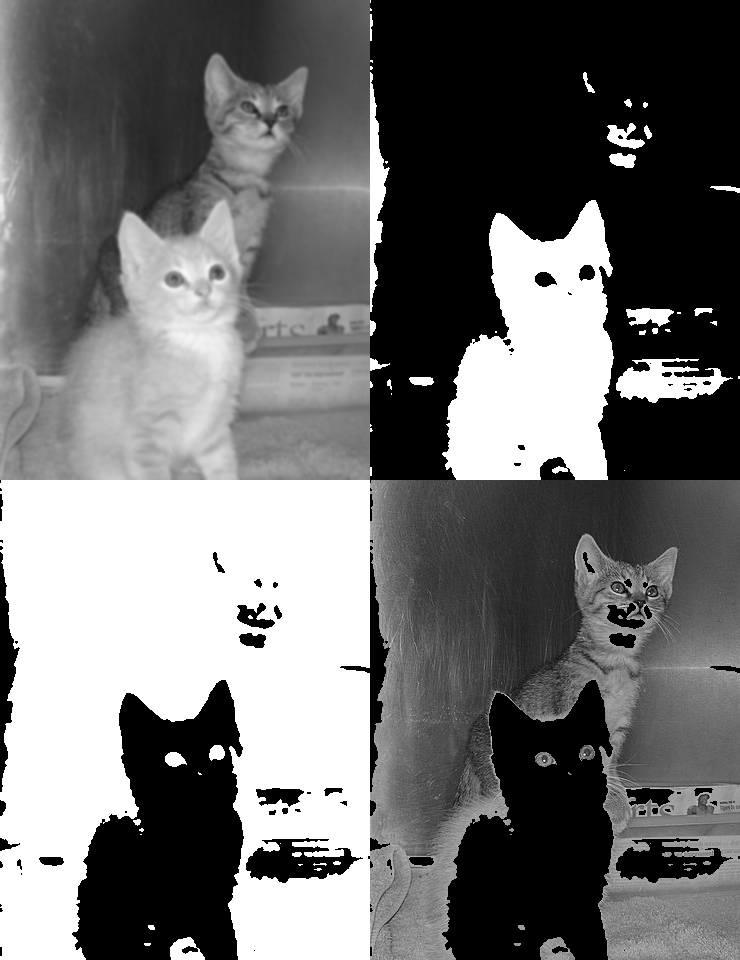

-1

In [ ]:
cv2_imshow(result)
cv2.waitKey(0)